In [14]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Dataset structure:
['paper', 'rock', 'scissors']
paper: 713 images
rock: 726 images
scissors: 750 images

Total images: 2189


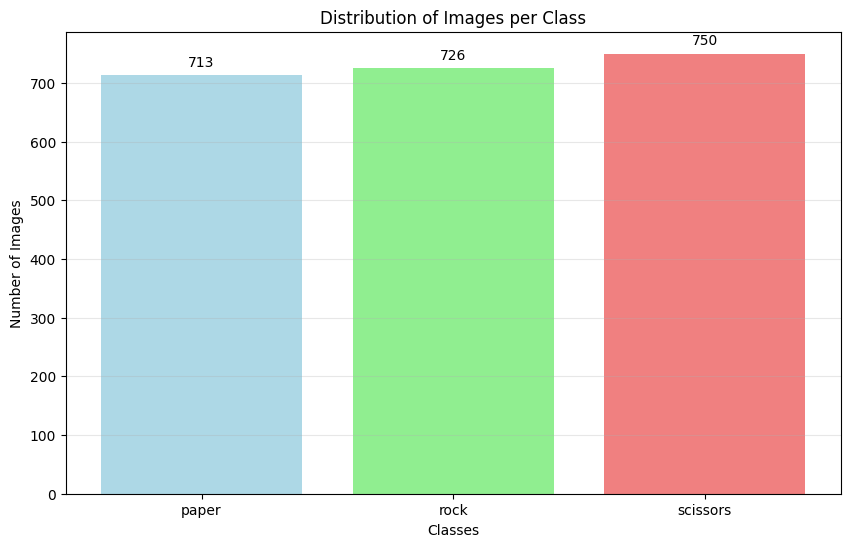

In [ ]:
# Dataset configuration
dataset_path = r'../image-dataset/rockpaperscissors/rps-cv-images'
classes = ['paper', 'rock', 'scissors']

print("Dataset structure:")
print(os.listdir(dataset_path))

# Count images in each class
class_counts = {}
total_images = 0

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.exists(class_path):
        count = len(os.listdir(class_path))
        class_counts[class_name] = count
        total_images += count
        print(f"{class_name}: {count} images")

print(f"\nTotal images: {total_images}")

# Visualize class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Images per Class')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values()):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

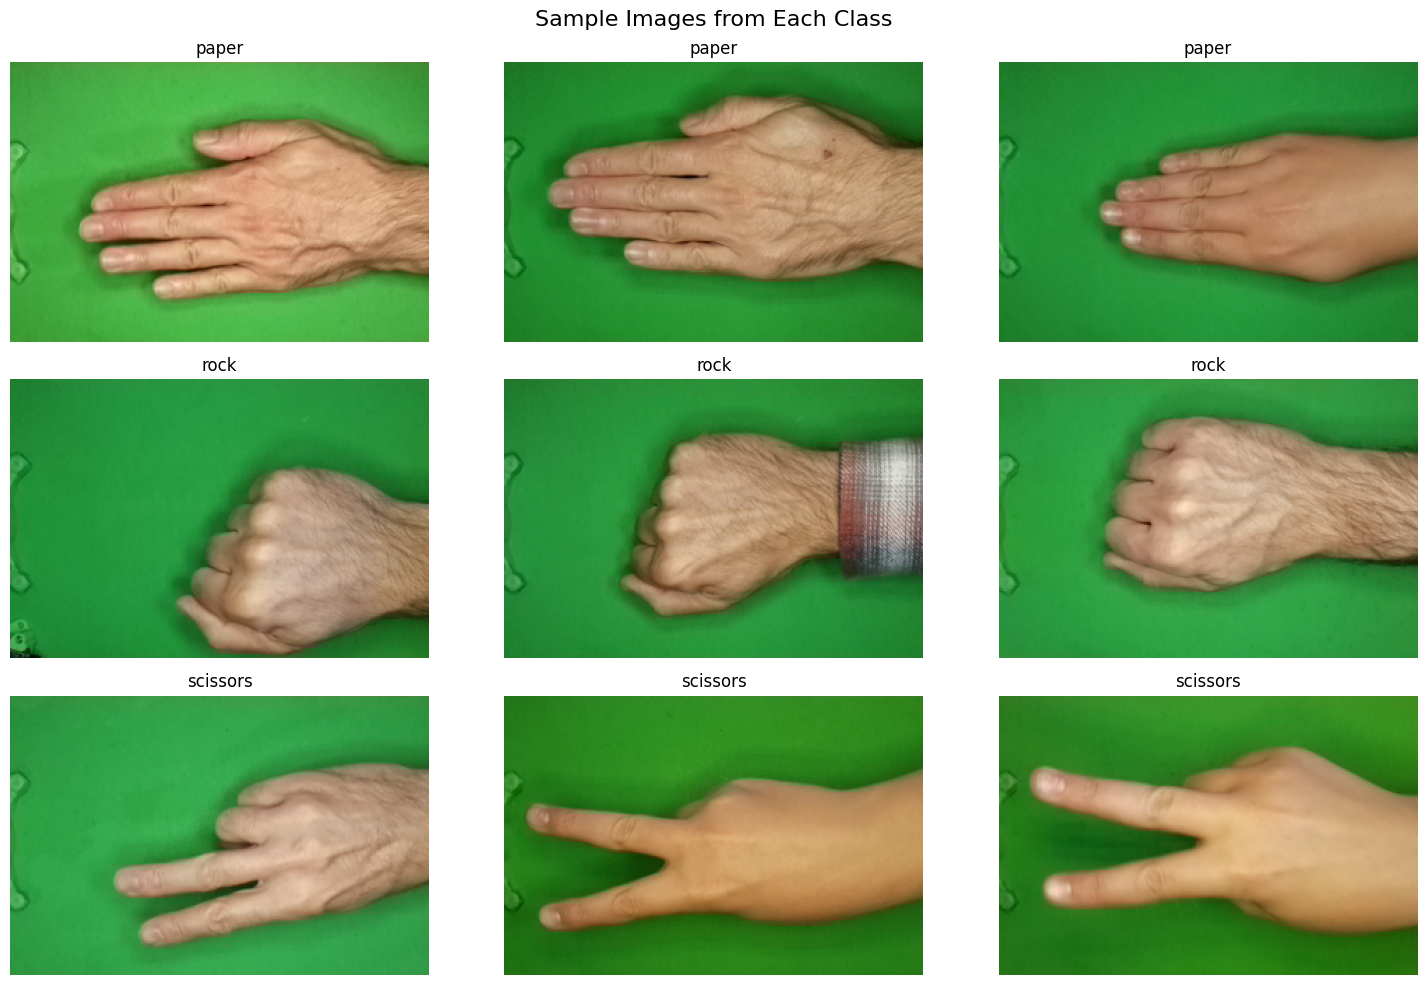

In [10]:
# Display sample images from each class
def display_sample_images(dataset_path, classes, samples_per_class=3):
    fig, axes = plt.subplots(len(classes), samples_per_class, figsize=(15, 10))
    fig.suptitle('Sample Images from Each Class', fontsize=16)
    
    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)[:samples_per_class]
        
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            axes[i, j].imshow(image)
            axes[i, j].set_title(f'{class_name}')
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

display_sample_images(dataset_path, classes)

In [17]:
# Image preprocessing configuration
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Standard size for transfer learning models
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

# Data generators with comprehensive augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,          
    brightness_range=[0.7, 1.3],
    channel_shift_range=0.1,
    fill_mode='nearest',           
    validation_split=VALIDATION_SPLIT
)

# Validation data generator (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=VALIDATION_SPLIT
)

# Test data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Data generators created successfully")

Data generators created successfully


In [20]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# Print class information
print("\nClasses:", train_generator.class_indices)
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.

Classes: {'paper': 0, 'rock': 1, 'scissors': 2}
Training samples: 1751
Validation samples: 437


Displaying augmented training images:


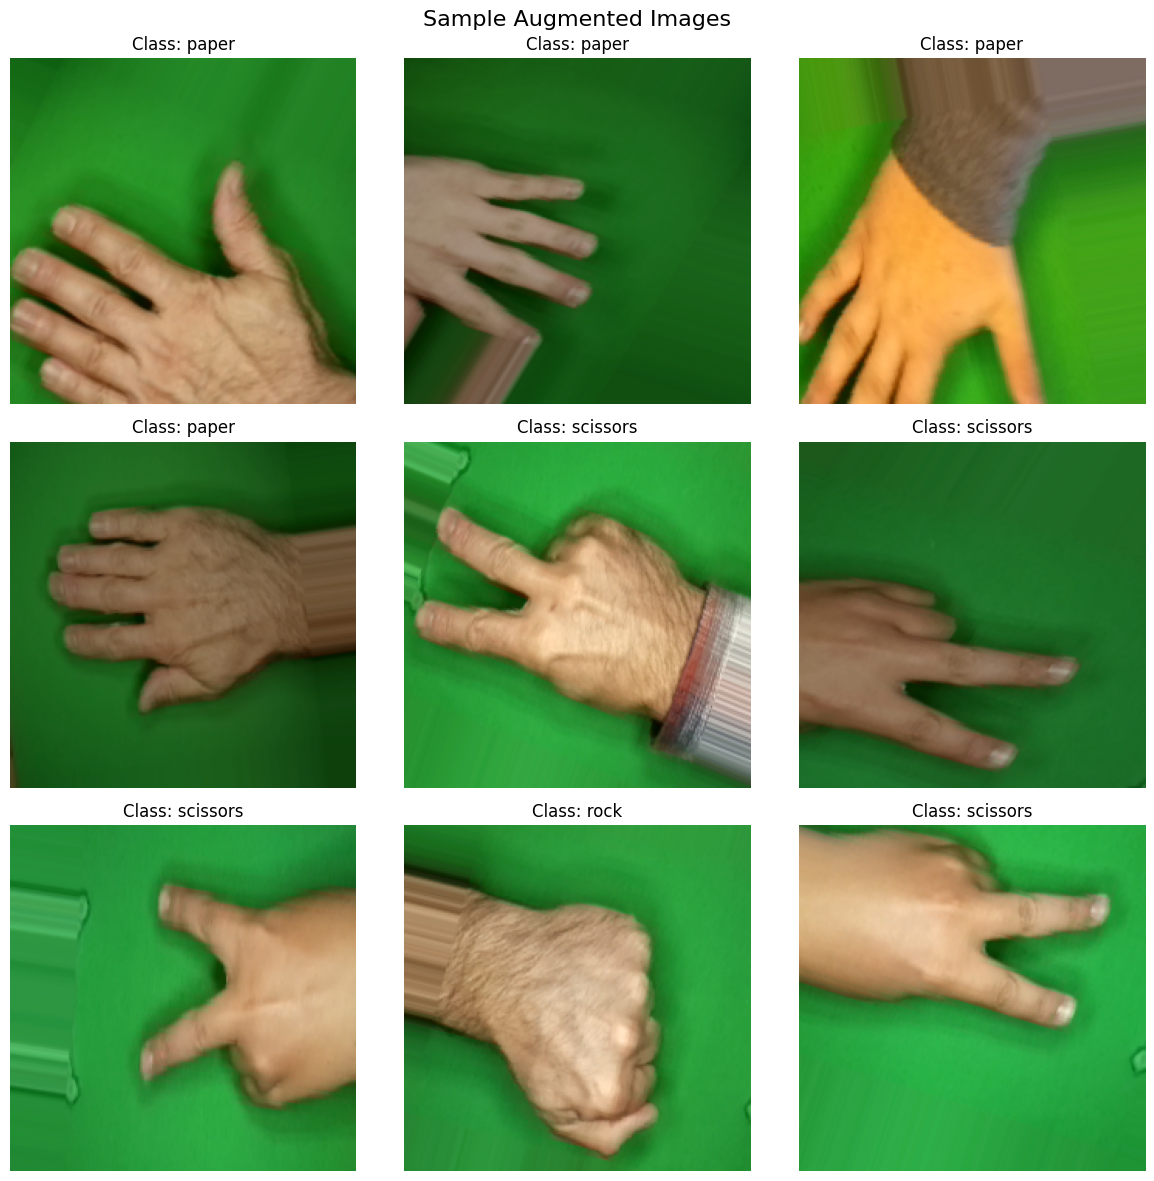

In [21]:
# Visualize augmented images
def show_augmented_images(generator, num_images=9):
    """Display original and augmented images side by side"""
    batch_images, batch_labels = next(generator)
    
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    fig.suptitle('Sample Augmented Images', fontsize=16)
    
    class_names = list(generator.class_indices.keys())
    
    for i in range(min(num_images, len(batch_images))):
        ax = axes[i//3, i%3]
        ax.imshow(batch_images[i])
        
        # Get class name from label
        label_index = np.argmax(batch_labels[i])
        class_name = class_names[label_index]
        
        ax.set_title(f'Class: {class_name}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Displaying augmented training images:")
show_augmented_images(train_generator)